In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [11]:
print("Forma do dataset:", df.shape)
df.info()

Forma do dataset: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  ob

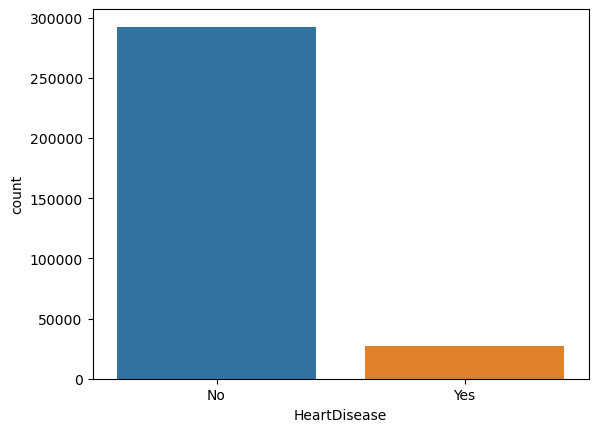

In [16]:
sns.countplot(x=df['HeartDisease'])
plt.show()

In [17]:
continuous_vars=df.select_dtypes('float64').columns
print(continuous_vars)
categorical_vars=df.select_dtypes('object').columns
print(categorical_vars)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')
Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [18]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


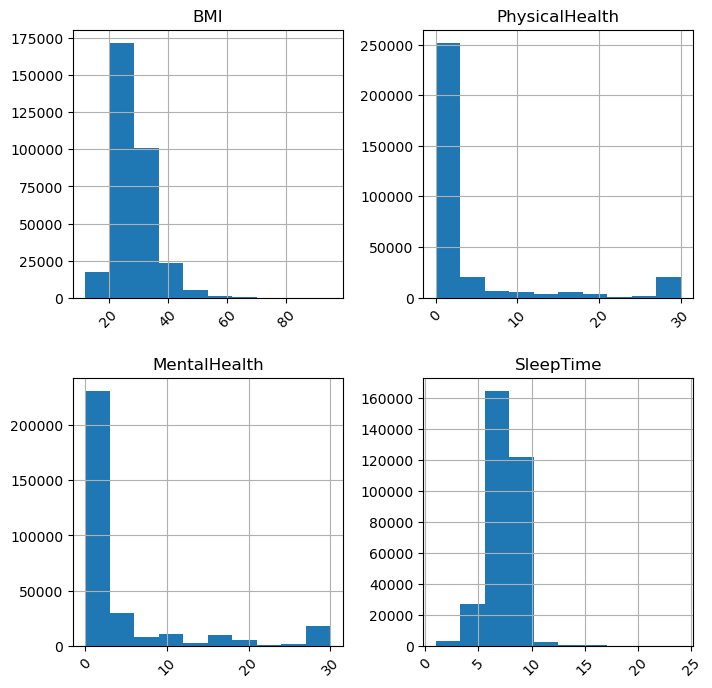

In [19]:
df.hist(figsize=(8,8), xrot=45)
plt.show()

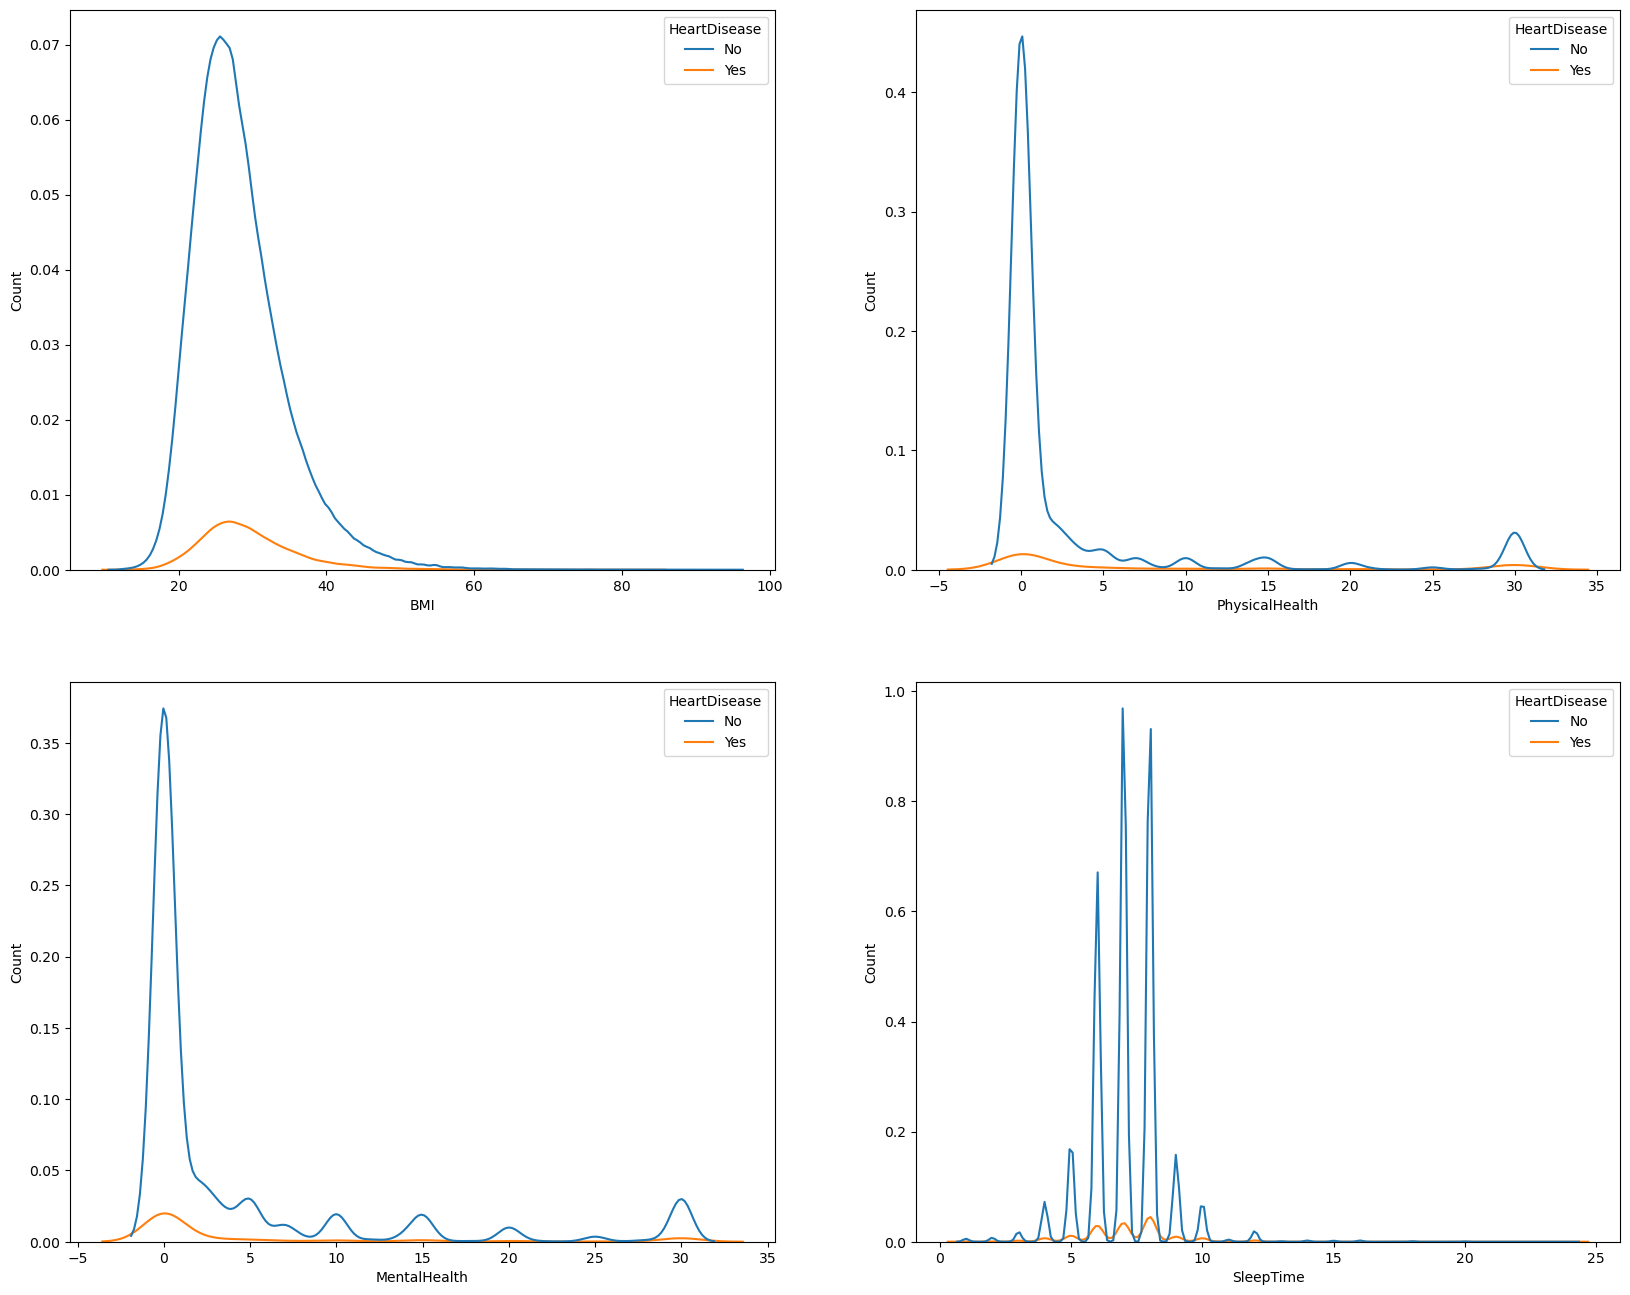

In [21]:
i=1
plt.figure(figsize = (20,16))
for col in continuous_vars:
    plt.subplot(2,2,i)
    sns.kdeplot(x=col,hue='HeartDisease',data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

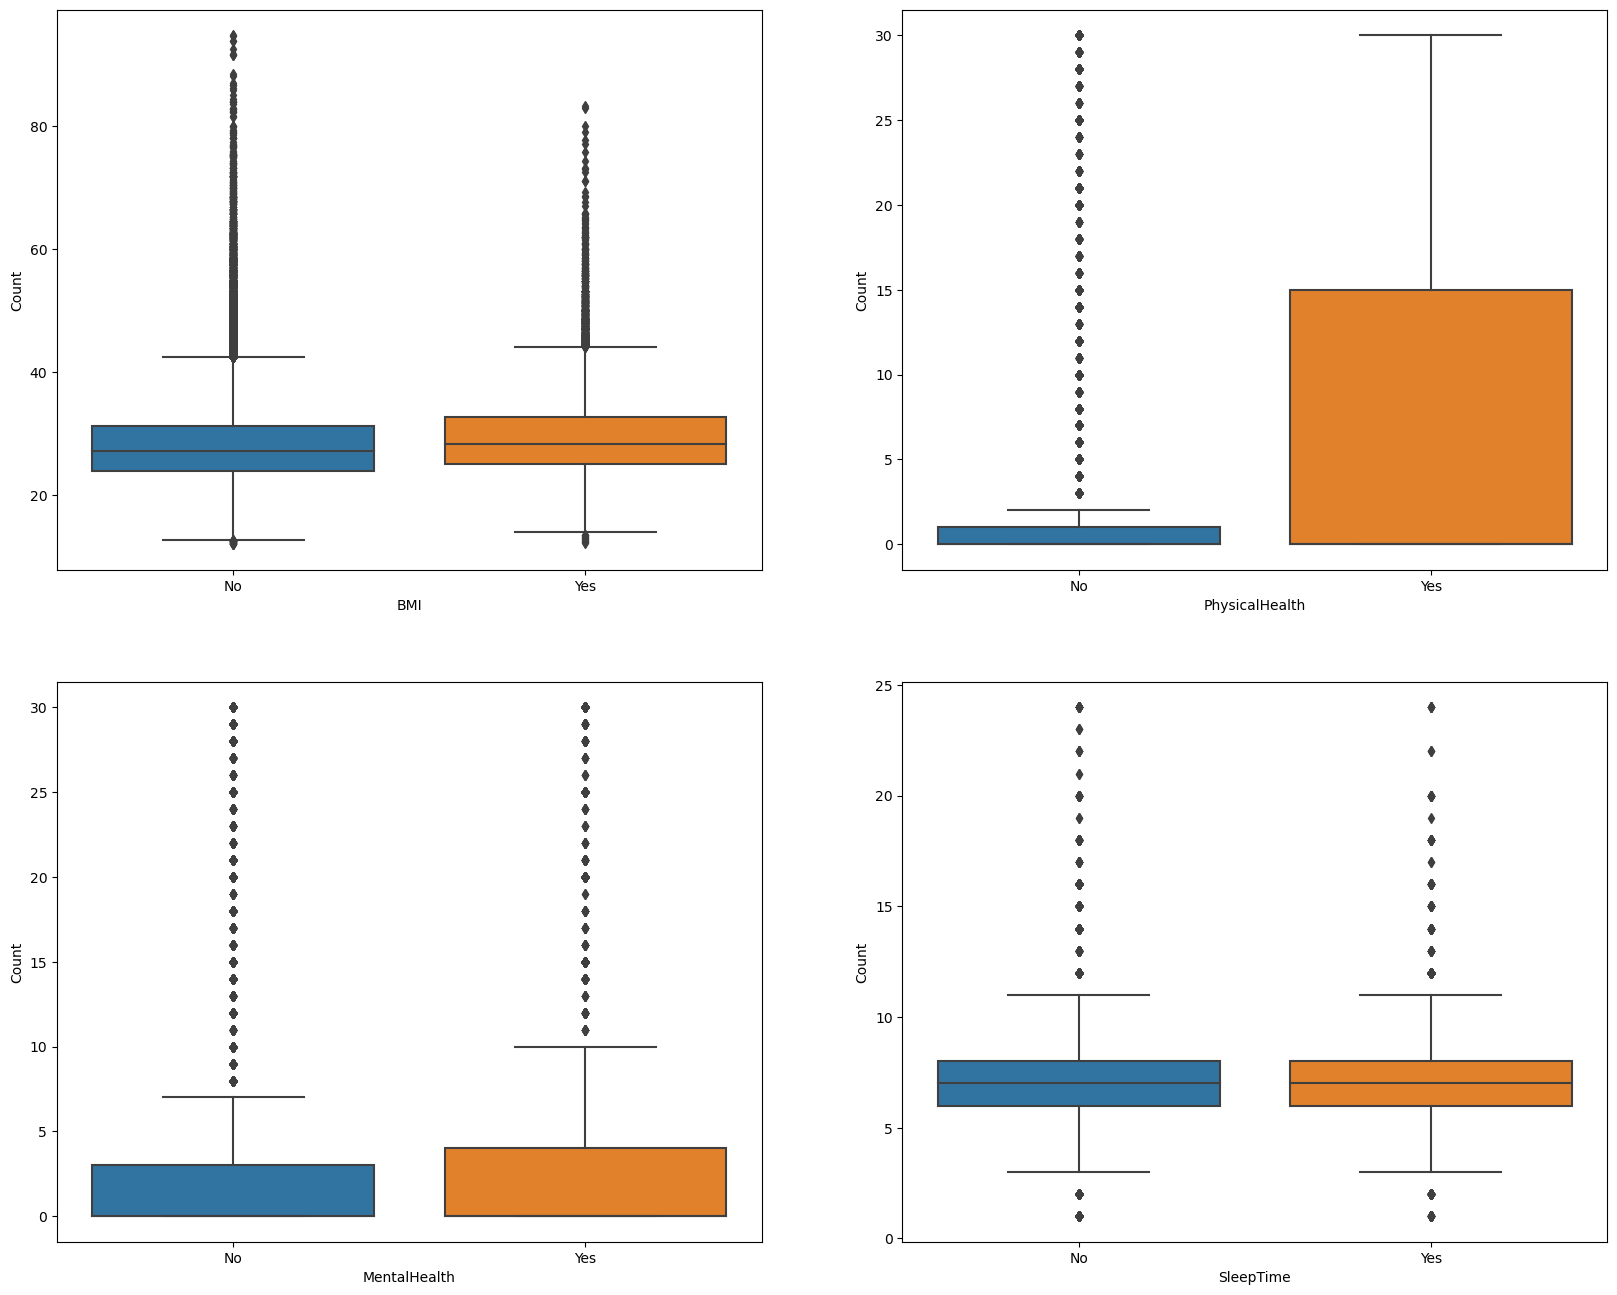

In [22]:
i=1
plt.figure(figsize = (20,16))
for col in continuous_vars:
    plt.subplot(2,2,i)
    sns.boxplot(y=col, x='HeartDisease', data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

In [23]:
df.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


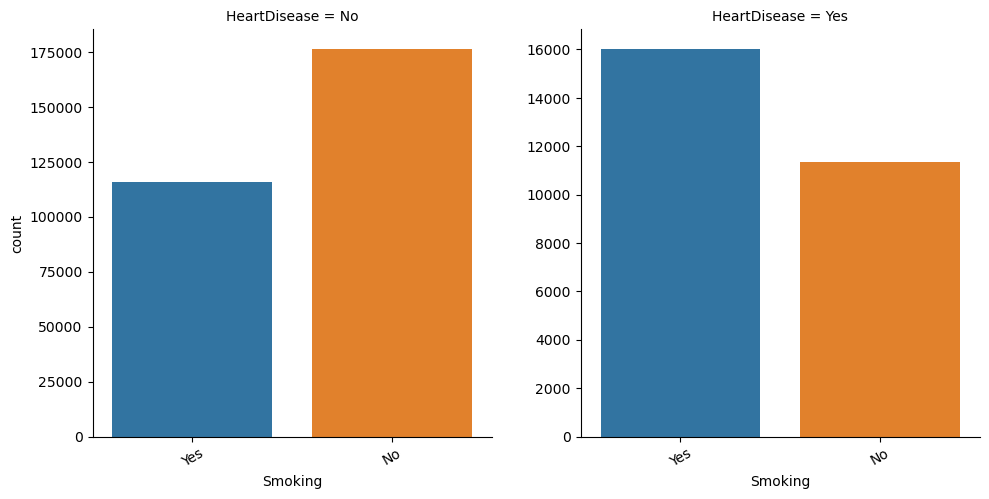

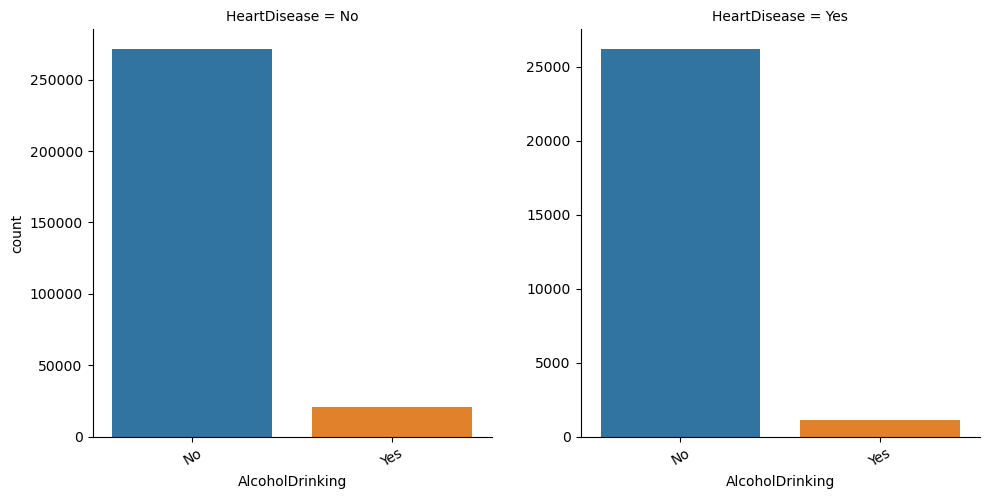

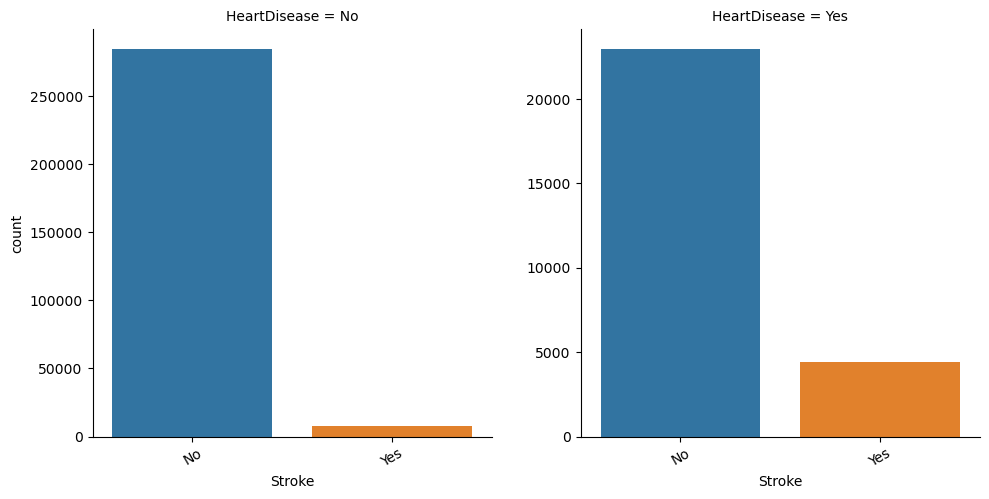

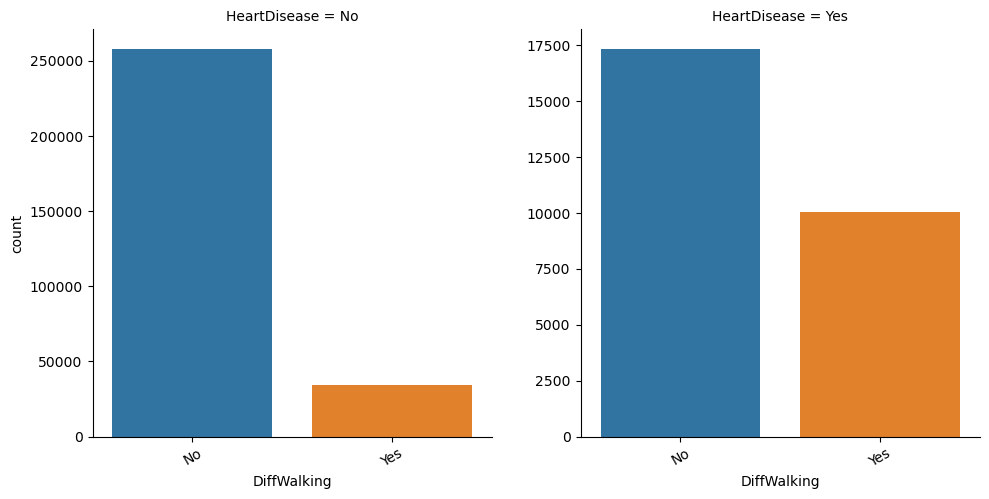

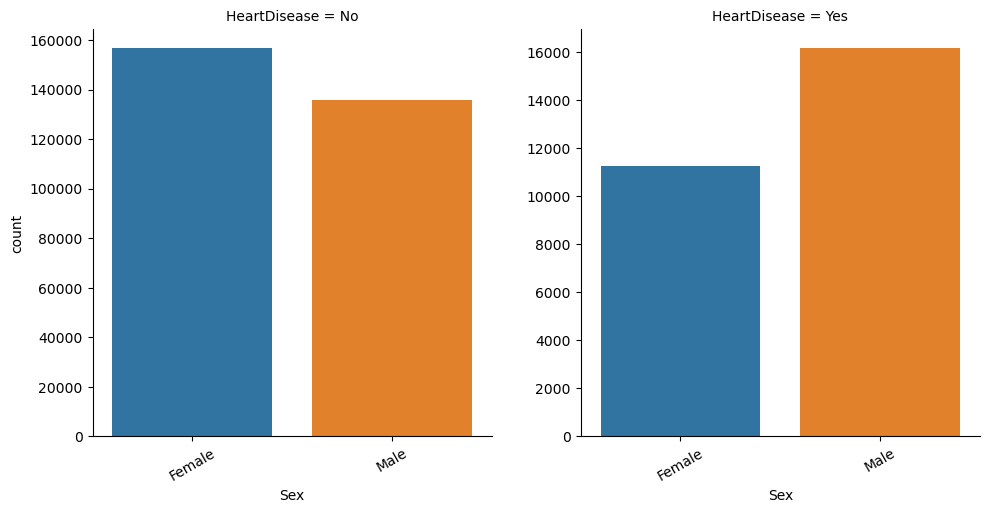

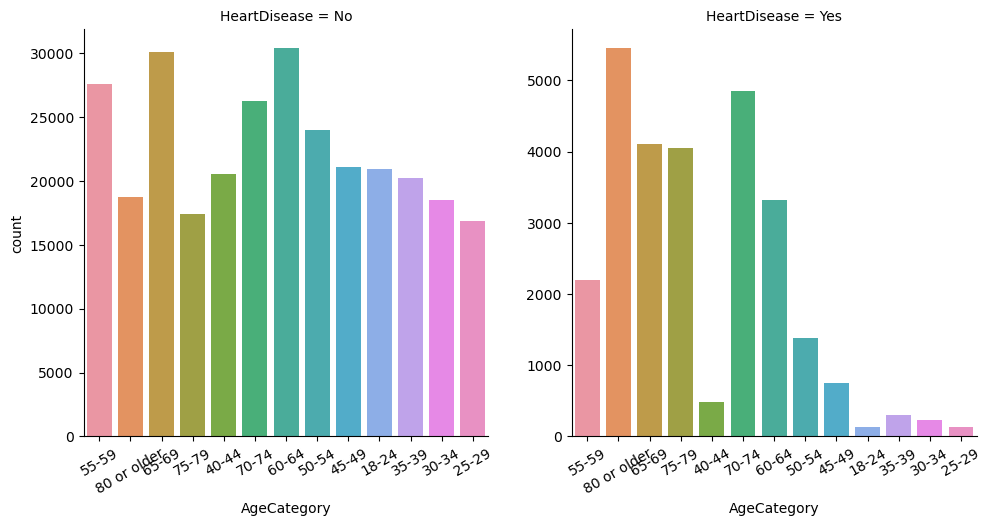

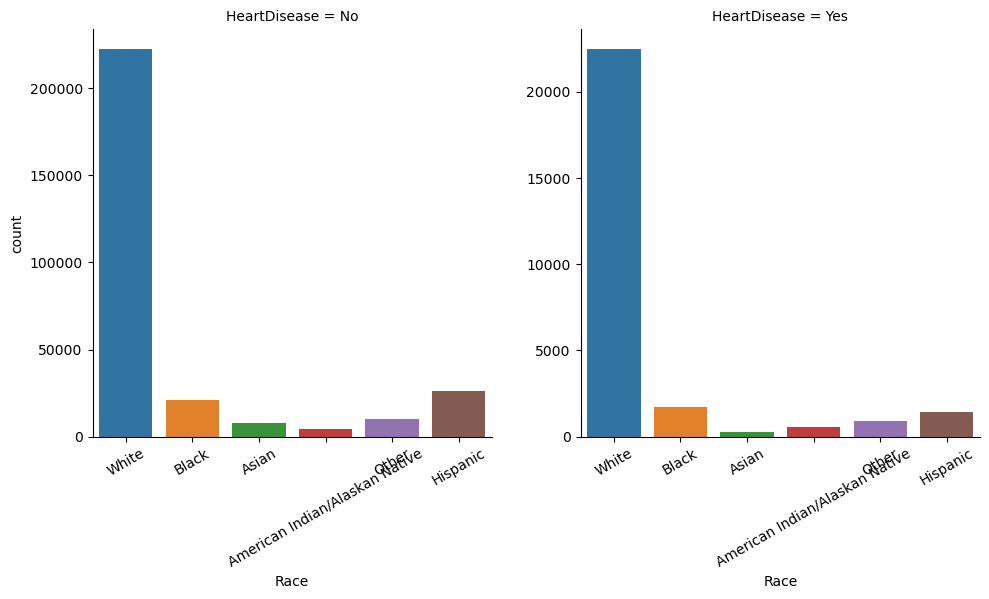

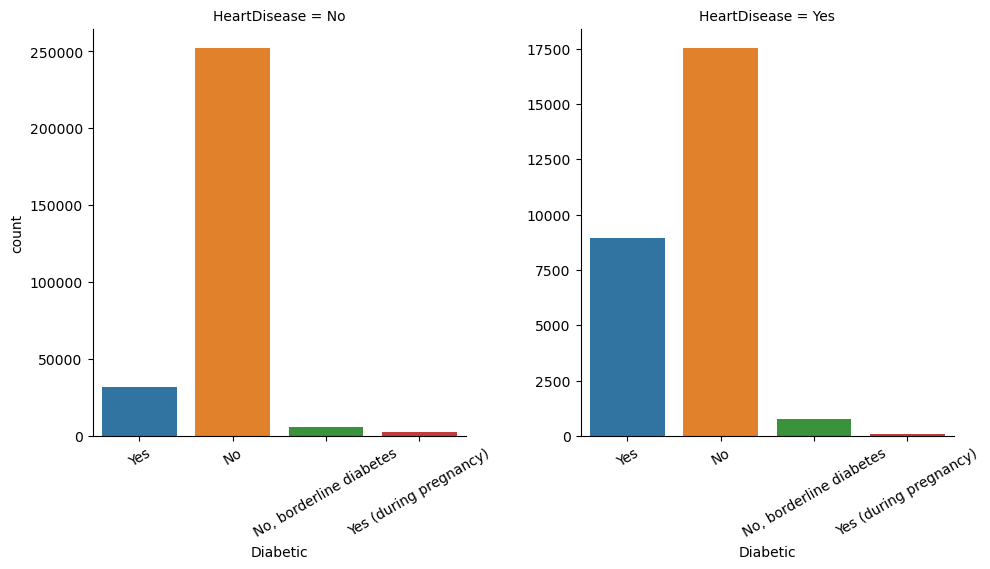

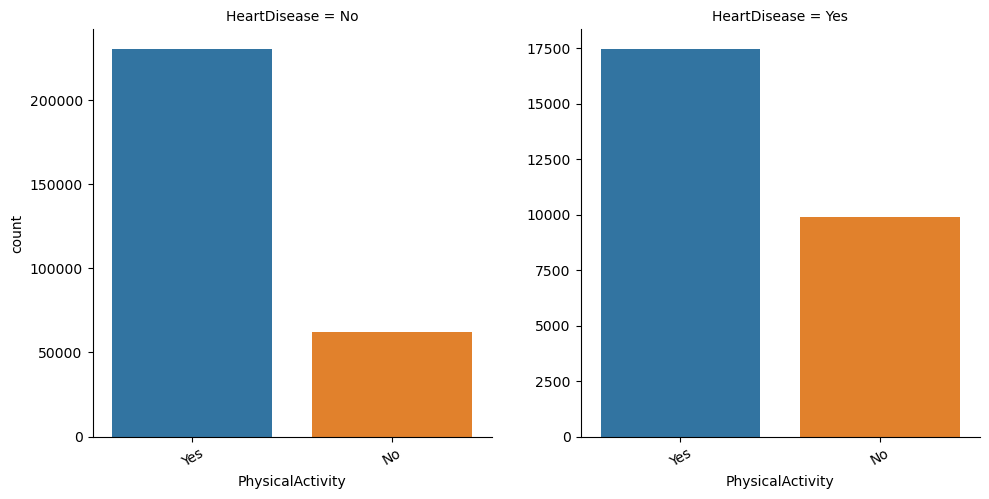

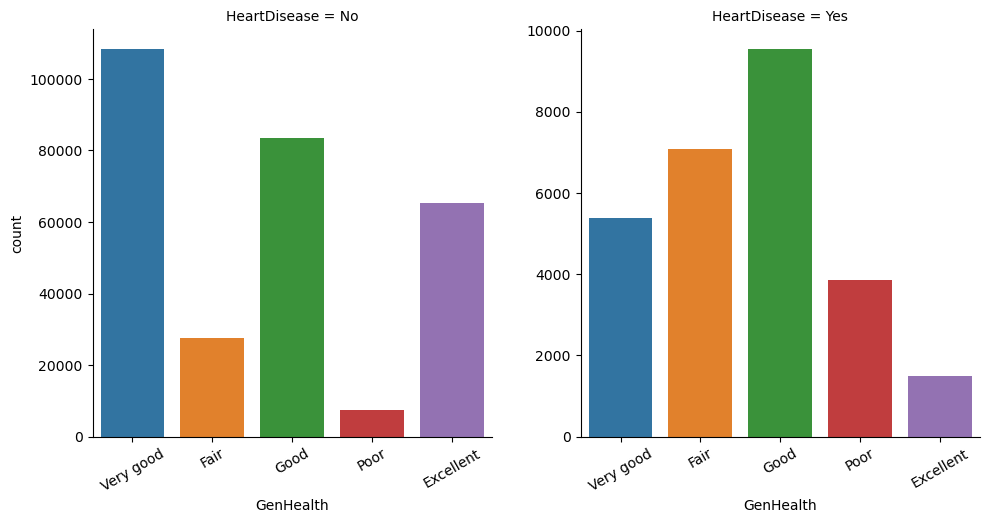

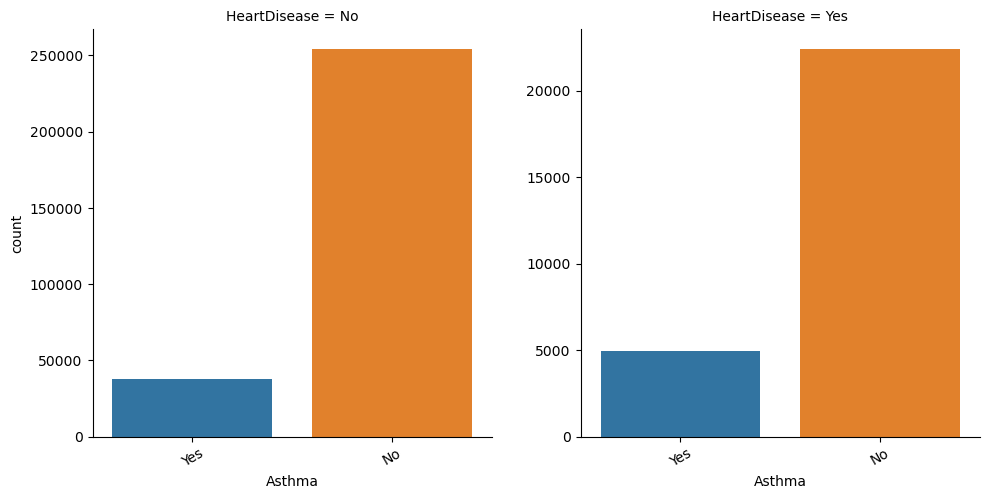

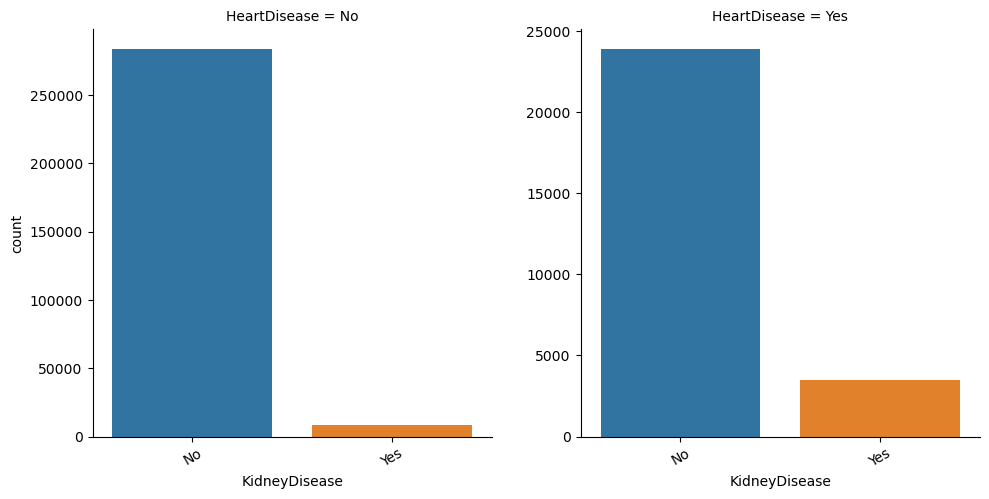

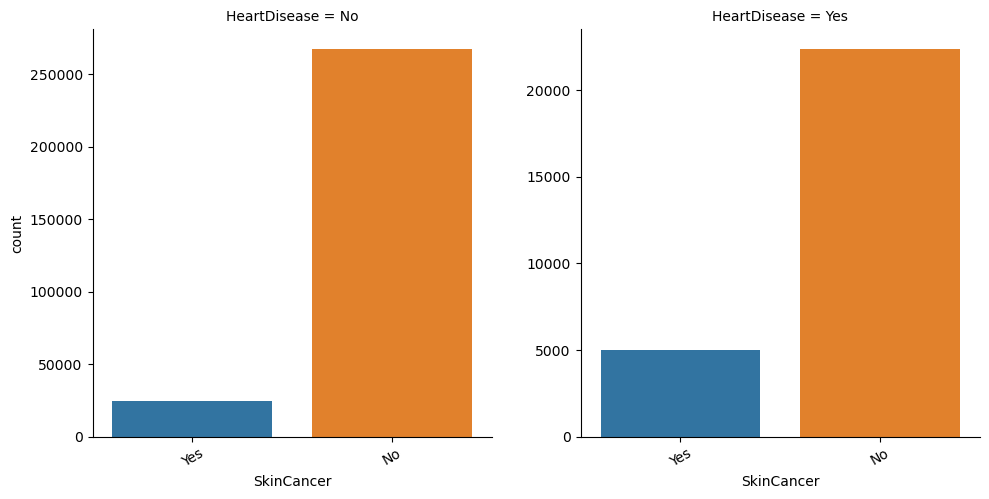

In [26]:
for col in categorical_vars[1:]:
    g = sns.catplot(x=col, col='HeartDisease', kind='count', data=df, sharey=False)
    g.set_xticklabels(rotation=60)

In [27]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [30]:
print("Forma inicial:", df.shape)
print("Duplicatas no dataset:", df.duplicated().sum())

Forma inicial: (301717, 18)
Duplicatas no dataset: 0


In [31]:
df.drop_duplicates(inplace=True)

print("Nova forma:", df.shape)
print("Duplicatas no dataset:", df.duplicated().sum())

Nova forma: (301717, 18)
Duplicatas no dataset: 0


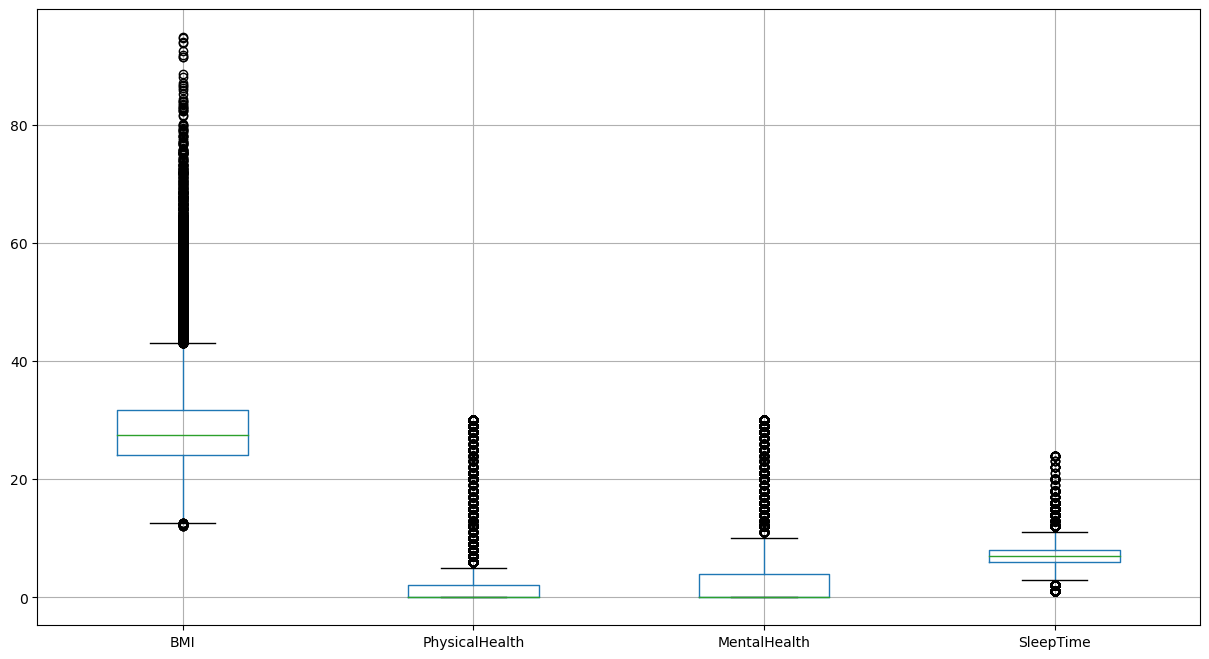

In [32]:
plt.figure(figsize=(15,8))
df.boxplot(column=list(continuous_vars))
plt.show()

In [33]:
def limites_outlier(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    limite_superior = q3 + 1.5*iqr
    limite_inferior = q1 - 1.5*iqr
    return limite_superior, limite_inferior

In [36]:
for col in continuous_vars:
    print("--------------------------------------------------")
    print("Coluna:", col)
    
    LS,LI = limites_outlier(df[col])
    print("Limite superior =", LS)
    print("Limite inferior =", LI)
    
    total_outliers = len(df.loc[df[col]<LI,col]) + len(df.loc[df[col]>LS,col])
    percentual = (total_outliers / len(df.index) )*100
    
    print("Percentual de Outliers=", percentual)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Coluna: BMI
Limite superior = 43.08
Limite inferior = 12.600000000000005
Percentual de Outliers= 2.9514412512387436
-------------------------------------------------- 

--------------------------------------------------
Coluna: PhysicalHealth
Limite superior = 5.0
Limite inferior = -3.0
Percentual de Outliers= 15.622586728623181
-------------------------------------------------- 

--------------------------------------------------
Coluna: MentalHealth
Limite superior = 10.0
Limite inferior = -6.0
Percentual de Outliers= 13.162334240364315
-------------------------------------------------- 

--------------------------------------------------
Coluna: SleepTime
Limite superior = 11.0
Limite inferior = 3.0
Percentual de Outliers= 1.5053841845172795
-------------------------------------------------- 



In [37]:
df.select_dtypes(include='float64').skew()

BMI               1.297737
PhysicalHealth    2.501000
MentalHealth      2.237470
SleepTime         0.697224
dtype: float64

In [39]:
#removendo registros de BMI e SleepTime
for col in ['BMI', 'SleepTime']:
    LS,LI = limites_outlier(df[col])
    df.loc[df[col]<LI,col]=np.nan
    df.loc[df[col]>LS,col]=np.nan

df.dropna(subset=['BMI', 'SleepTime'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288496 entries, 0 to 288495
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      288496 non-null  object 
 1   BMI               288496 non-null  float64
 2   Smoking           288496 non-null  object 
 3   AlcoholDrinking   288496 non-null  object 
 4   Stroke            288496 non-null  object 
 5   PhysicalHealth    288496 non-null  float64
 6   MentalHealth      288496 non-null  float64
 7   DiffWalking       288496 non-null  object 
 8   Sex               288496 non-null  object 
 9   AgeCategory       288496 non-null  object 
 10  Race              288496 non-null  object 
 11  Diabetic          288496 non-null  object 
 12  PhysicalActivity  288496 non-null  object 
 13  GenHealth         288496 non-null  object 
 14  SleepTime         288496 non-null  float64
 15  Asthma            288496 non-null  object 
 16  KidneyDisease     28

                     BMI  PhysicalHealth  MentalHealth  SleepTime
BMI             1.000000        0.067872      0.025910  -0.055475
PhysicalHealth  0.067872        1.000000      0.267142  -0.095702
MentalHealth    0.025910        0.267142      1.000000  -0.154360
SleepTime      -0.055475       -0.095702     -0.154360   1.000000


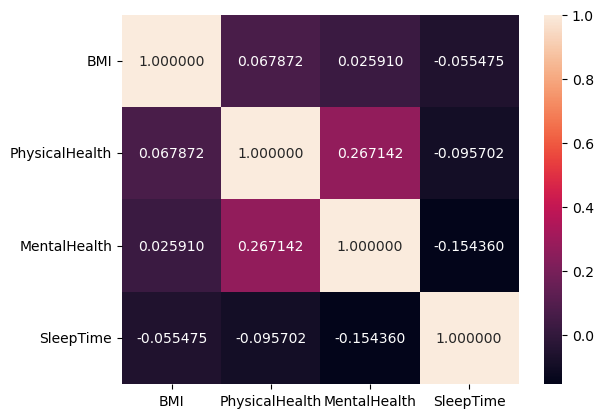

In [40]:
df_corr=df.select_dtypes(include='float64').corr()
print(df_corr)
sns.heatmap(df_corr, annot=True, fmt="f")
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder

data=df.copy()
le = LabelEncoder()

col = data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [43]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

cols = list(continuous_vars)
data[cols] = std_scaler.fit_transform(data[cols])

data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-2.084999,1,0,0,-0.047585,3.264300,0,0,7,5,2,1,4,-1.636283,1,0,1
1,0,-1.389973,0,0,1,-0.427194,-0.499584,0,0,12,5,0,1,4,-0.041730,0,0,0
2,0,-0.230359,1,0,0,2.103530,3.264300,0,1,9,5,2,1,1,0.755547,1,0,0
3,0,-0.670789,0,0,0,-0.427194,-0.499584,0,0,11,5,0,0,2,-0.839007,0,0,1
4,0,-0.763707,0,0,0,3.115820,-0.499584,1,0,4,5,0,1,4,0.755547,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,0,-0.825033,0,0,0,-0.427194,-0.499584,0,0,8,3,0,1,0,-0.839007,0,0,0
288492,0,-1.040602,0,0,0,-0.427194,-0.499584,0,0,0,3,0,1,0,0.755547,0,0,0
288493,1,-0.076115,1,0,0,0.458560,-0.499584,1,1,8,3,2,0,1,-0.839007,1,0,0
288494,0,0.375465,1,0,0,-0.427194,-0.499584,0,1,3,3,0,1,4,-1.636283,1,0,0


In [44]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2)

In [45]:
training_data.reset_index(inplace=True, drop=True)
training_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,2.007103,0,0,0,-0.427194,-0.499584,0,0,3,0,1,1,2,0.755547,0,0,0
1,0,1.865867,0,0,0,-0.047585,1.382358,0,0,6,5,2,0,1,-2.433560,1,0,0
2,0,-1.022019,1,0,0,-0.427194,-0.499584,0,1,12,5,0,1,4,0.755547,0,0,0
3,1,1.014740,0,0,0,3.368892,-0.499584,1,0,10,5,2,0,1,0.755547,0,1,0
4,0,1.761799,1,0,0,-0.427194,-0.499584,0,1,9,5,2,1,2,-0.839007,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230791,0,-0.230359,0,0,0,-0.427194,-0.248659,0,1,5,5,0,1,0,-0.041730,0,0,0
230792,0,-1.341656,1,1,0,-0.427194,0.755044,0,0,5,1,1,1,4,-0.041730,0,0,0
230793,0,0.119012,0,1,0,-0.427194,-0.499584,0,1,8,5,0,1,4,-0.041730,1,0,0
230794,0,-0.237792,0,0,0,-0.174121,1.382358,0,1,8,5,0,1,4,-0.839007,0,0,0


In [46]:
testing_data.reset_index(inplace=True, drop=True)
testing_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.702177,1,0,0,-0.427194,-0.374121,0,0,6,5,0,1,2,-0.041730,0,0,0
1,0,-1.137237,1,0,0,-0.427194,0.755044,1,1,3,5,0,1,4,-1.636283,0,0,0
2,0,0.607760,0,0,0,-0.427194,0.002267,1,0,10,5,0,1,2,0.755547,0,0,0
3,0,0.481392,0,0,0,1.470849,2.009672,0,1,7,5,2,1,3,0.755547,0,0,0
4,0,-0.419911,0,0,0,-0.427194,0.755044,0,1,3,5,0,1,4,-0.839007,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57695,0,0.122729,0,0,0,-0.427194,-0.499584,1,1,12,5,2,0,2,-0.041730,0,0,0
57696,1,-0.633622,1,0,0,0.585096,2.009672,1,1,7,5,2,1,2,-0.041730,0,0,0
57697,0,-0.771141,0,0,0,-0.427194,-0.499584,0,1,3,5,0,0,4,1.552824,0,0,0
57698,0,-0.890075,1,0,0,-0.427194,-0.499584,0,0,11,5,0,1,2,0.755547,0,0,0


In [47]:
X_test = testing_data.drop(['HeartDisease'], axis=1)
y_test = testing_data['HeartDisease']

X_train = training_data.drop(['HeartDisease'], axis=1)
y_train = training_data['HeartDisease']

---------------------------------------------------------------------------
Acurácia do modelo: 0.9128
Classificação:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     52664
           1       0.50      0.08      0.14      5036

    accuracy                           0.91     57700
   macro avg       0.71      0.54      0.55     57700
weighted avg       0.88      0.91      0.88     57700

Matriz de confusão:


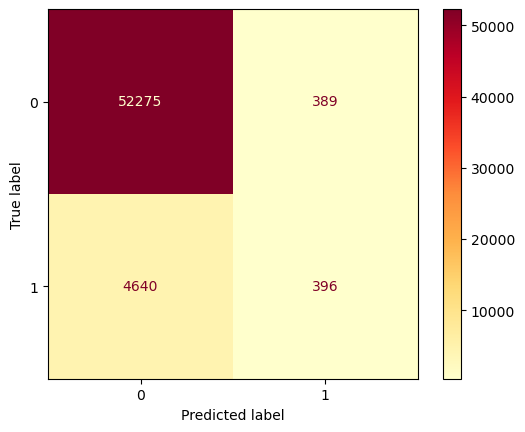

---------------------------------------------------------------------------


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score 

print("---------------------------------------------------------------------------")
    
# Modelo de logistic regression
clf_LR= LogisticRegression(random_state=0).fit(X_train, y_train)
pred = clf_LR.predict(X_test)
    
print('Acurácia do modelo: {0:0.4f}'. format(accuracy_score(y_test, pred)))
print("Classificação:\n")
print(classification_report(y_test,pred))
    
print("Matriz de confusão:") 
ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='YlOrRd')
plt.show()
print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
Acurácia do modelo: 0.9127
Classificação:



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     52664
           1       0.00      0.00      0.00      5036

    accuracy                           0.91     57700
   macro avg       0.46      0.50      0.48     57700
weighted avg       0.83      0.91      0.87     57700

Matriz de Confusão:


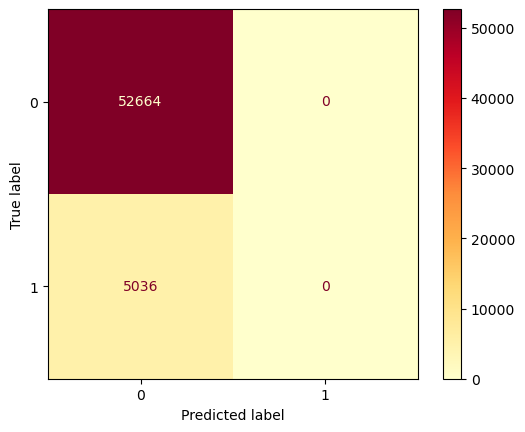

---------------------------------------------------------------------------


In [51]:
from sklearn.tree import DecisionTreeClassifier

print("---------------------------------------------------------------------------")
    
clf_dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 
clf_dtc.fit(X_train, y_train)
        
pred = clf_dtc.predict(X_test)
print('Acurácia do modelo: {0:0.4f}'. format(accuracy_score(y_test, pred)))
print("Classificação:\n")
print(classification_report(y_test,pred))
    
print("Matriz de Confusão:") 
ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='YlOrRd')
plt.show()
print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
Acurácia do modelo: 0.9127
Classificação:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     52664
           1       0.00      0.00      0.00      5036

    accuracy                           0.91     57700
   macro avg       0.46      0.50      0.48     57700
weighted avg       0.83      0.91      0.87     57700

Matriz de Confusão


C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


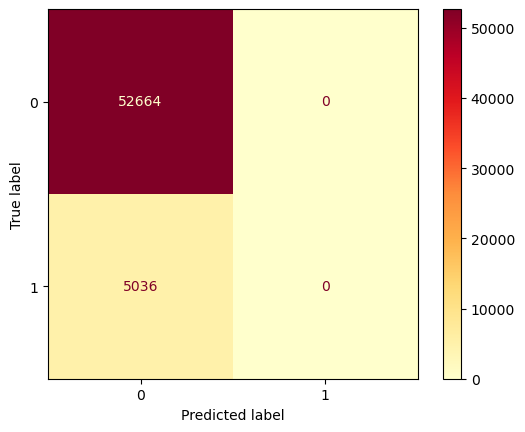

---------------------------------------------------------------------------


In [52]:
from sklearn.tree import DecisionTreeClassifier

print("---------------------------------------------------------------------------")
    
clf_dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 
clf_dtc.fit(X_train, y_train)
        
pred = clf_dtc.predict(X_test)
print('Acurácia do modelo: {0:0.4f}'. format(accuracy_score(y_test, pred)))
print("Classificação:\n")
print(classification_report(y_test,pred))
    
print("Matriz de Confusão") 
ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='YlOrRd')
plt.show()
print("---------------------------------------------------------------------------")

Acurácia do modelo: 0.9017
Classificação:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     52664
           1       0.31      0.10      0.15      5036

    accuracy                           0.90     57700
   macro avg       0.61      0.54      0.55     57700
weighted avg       0.87      0.90      0.88     57700

Matriz de confusão:


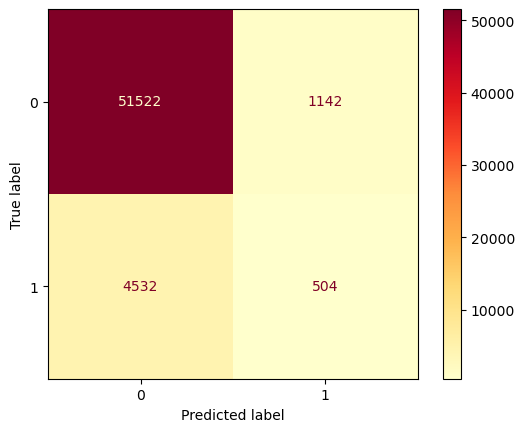

---------------------------------------------------------------------------


In [54]:
from sklearn.ensemble import  RandomForestClassifier
    
clf_RF= RandomForestClassifier().fit(X_train, y_train)
        
pred = clf_RF.predict(X_test)
print('Acurácia do modelo: {0:0.4f}'. format(accuracy_score(y_test, pred)))
print("Classificação:\n")
print(classification_report(y_test,pred))
    
print("Matriz de confusão:") 
ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='YlOrRd')
plt.show()
print("---------------------------------------------------------------------------")


Acurácia do modelo: 0.8461
Classificação:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     52664
           1       0.27      0.44      0.33      5036

    accuracy                           0.85     57700
   macro avg       0.60      0.66      0.62     57700
weighted avg       0.88      0.85      0.86     57700

Matriz de Confusão:


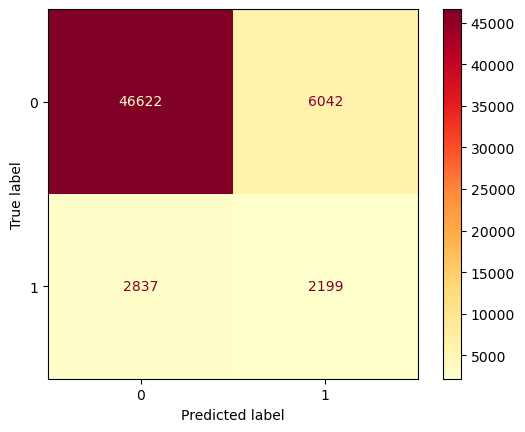

---------------------------------------------------------------------------


In [56]:
from sklearn.naive_bayes import GaussianNB
  
clf_gnb = GaussianNB()
pred = clf_gnb.fit(X_train, y_train).predict(X_test)
    
print('Acurácia do modelo: {0:0.4f}'. format(accuracy_score(y_test, pred)))
print("Classificação:\n")
print(classification_report(y_test,pred))
    
print("Matriz de Confusão:") 
ConfusionMatrixDisplay.from_predictions(y_test,pred, cmap='YlOrRd')
plt.show()
print("---------------------------------------------------------------------------")

C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Acurácia do modelo: 0.9075
Classificação:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     52664
           1       0.37      0.09      0.14      5036

    accuracy                           0.91     57700
   macro avg       0.64      0.54      0.55     57700
weighted avg       0.87      0.91      0.88     57700

Matriz de Confusão


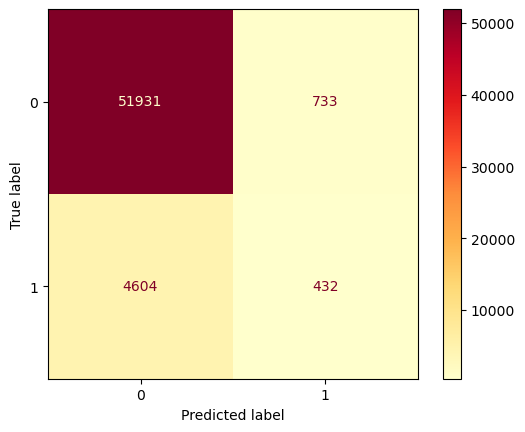

---------------------------------------------------------------------------


In [58]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=7)
clf_knn.fit(X_train, y_train)
pred = clf_knn.predict(X_test)
    
print('Acurácia do modelo: {0:0.4f}'. format(accuracy_score(y_test, pred)))
print("Classificação:\n")
print(classification_report(y_test,pred))
    
print("Matriz de Confusão") 
ConfusionMatrixDisplay.from_predictions(y_test,pred, cmap='YlOrRd')
plt.show()
print("---------------------------------------------------------------------------")

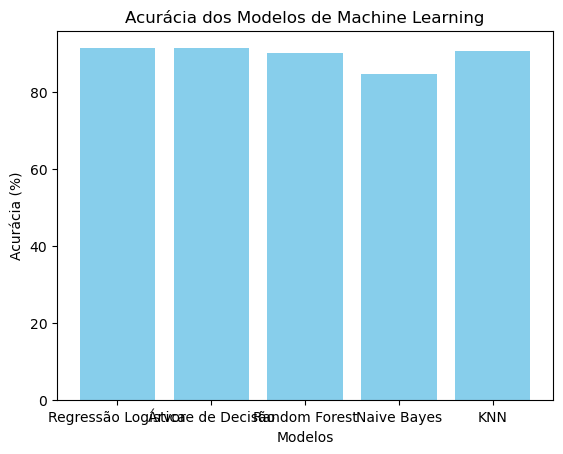

In [60]:
import matplotlib.pyplot as plt

model_names = ['Regressão Logística', 'Árvore de Decisão', 'Random Forest', 'Naive Bayes', 'KNN']
accuracy_scores = [91.28, 91.27, 90.17, 84.61, 90.46]

plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Modelos')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia dos Modelos de Machine Learning')
plt.show()


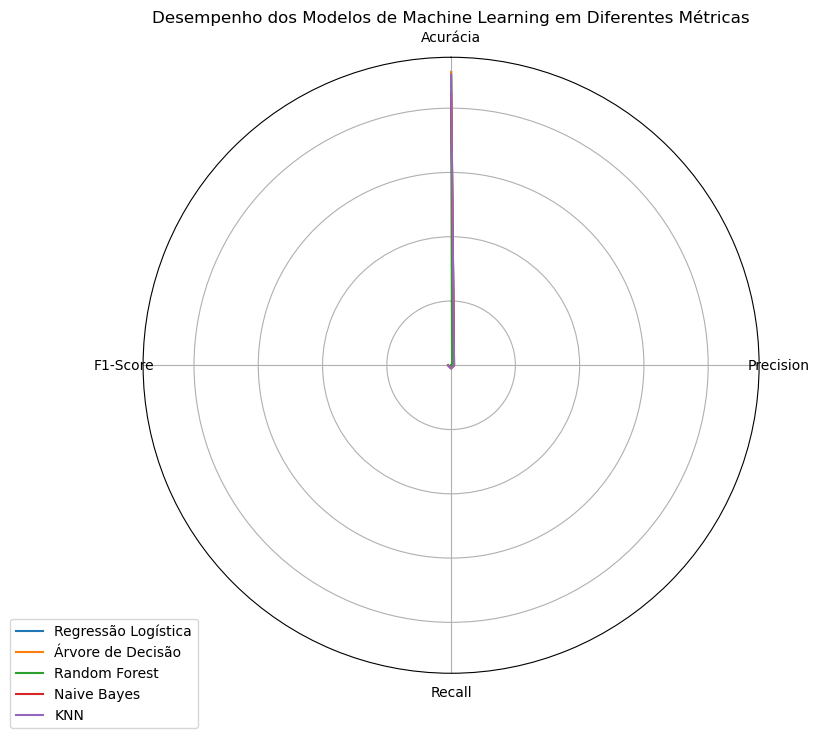

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Dados fictícios para ilustração - substitua pelos resultados reais
model_names = ['Regressão Logística', 'Árvore de Decisão', 'Random Forest', 'Naive Bayes', 'KNN']
accuracy_scores = [91.28, 91.27, 90.17, 84.61, 90.46]
precision_scores = [0.92, 0.91, 0.31, 0.94, 0.92]
recall_scores = [0.99, 1.00, 0.10, 0.89, 0.98]
f1_scores = [0.95, 0.95, 0.15, 0.91, 0.95]

# Criar um gráfico de radar
categories = ['Acurácia', 'Precision', 'Recall', 'F1-Score']

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

for model_name, accuracy, precision, recall, f1 in zip(model_names, accuracy_scores, precision_scores, recall_scores, f1_scores):
    values = [accuracy, precision, recall, f1]
    ax.plot(np.radians(np.arange(0, 360, 360 / len(categories))), values, label=model_name)
    ax.fill_between(np.radians(np.arange(0, 360, 360 / len(categories))), 0, values, alpha=0.1)

ax.set_yticklabels([])
ax.set_xticks(np.radians(np.arange(0, 360, 360 / len(categories))))
ax.set_xticklabels(categories)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Desempenho dos Modelos de Machine Learning em Diferentes Métricas')
plt.show()


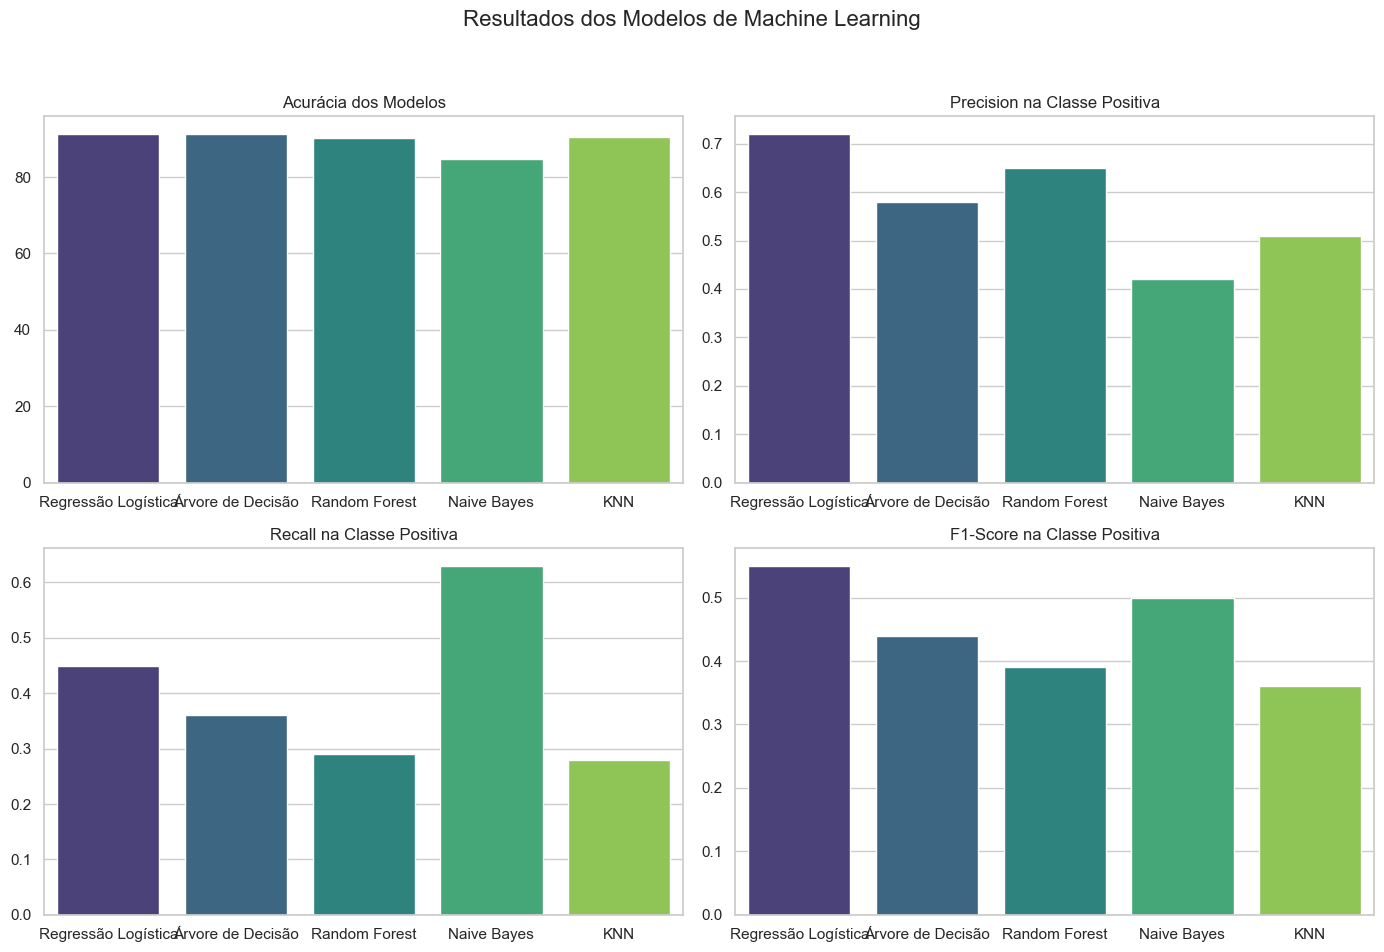

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados
model_names = ['Regressão Logística', 'Árvore de Decisão', 'Random Forest', 'Naive Bayes', 'KNN']
accuracy_scores = [91.28, 91.27, 90.17, 84.61, 90.46]
precision_scores_positive = [0.72, 0.58, 0.65, 0.42, 0.51]
recall_scores_positive = [0.45, 0.36, 0.29, 0.63, 0.28]
f1_scores_positive = [0.55, 0.44, 0.39, 0.50, 0.36]

# Configurar estilo do Seaborn
sns.set(style="whitegrid")

# Criar subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Resultados dos Modelos de Machine Learning', fontsize=16)

# Acurácia
sns.barplot(x=model_names, y=accuracy_scores, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Acurácia dos Modelos')

# Precision
sns.barplot(x=model_names, y=precision_scores_positive, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Precision na Classe Positiva')

# Recall
sns.barplot(x=model_names, y=recall_scores_positive, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Recall na Classe Positiva')

# F1-Score
sns.barplot(x=model_names, y=f1_scores_positive, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('F1-Score na Classe Positiva')

# Ajustes finais
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
